In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
import pickle

In [2]:
HotelFeatures=pickle.load(open('Feature.pickle','rb'))
targets=pickle.load(open('Target.pickle','rb'))

In [3]:
Hotel_Reviews_Filtered_Features=HotelFeatures
#Hotel_Reviews_Filtered_Features.head()

In [4]:
lb_make = LabelEncoder()
Hotel_Reviews_Filtered_Features["Reviewer_Nationality_Code"] = lb_make.fit_transform(Hotel_Reviews_Filtered_Features["Reviewer_Nationality"])
#Hotel_Reviews_Filtered_Features["Hotel_Name_Code"]=lb_make.fit_transform(Hotel_Reviews_Filtered_Features["Hotel_Name"])
Hotel_Reviews_Filtered_Features=Hotel_Reviews_Filtered_Features.drop(['Total_Number_of_Reviews_Reviewer_Has_Given',
 'lat','Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Nationality_Code','Total_Number_of_Reviews','Additional_Number_of_Scoring','Reviewer_Nationality','Hotel_Name','Hotel_Address','Review_Date','Negative_Review','Positive_Review','Tags','days_since_review'],axis=1)
#Hotel_Reviews_Filtered_Features

In [5]:
features=Hotel_Reviews_Filtered_Features


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

X_train_scaled = pd.DataFrame(X_train, index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(X_test, index=X_test.index.values, columns=X_test.columns.values)


/home/a_parida/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [8]:

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.425
Test data R-2 score: 0.439
Test data Spearman correlation: 0.639
Test data Pearson correlation: 0.664


In [9]:
rf.feature_importances_

array([ 0.10236717,  0.27674273,  0.1140143 ,  0.12200012,  0.24244881,
        0.14242687])

In [10]:
list(features)

['Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Review_Total_Positive_Word_Counts',
 'lng',
 'Positive_Polarity',
 'Negative_Polarity']

In [11]:
mean_squared_error(y_test, predicted_test)

1.5176505509306613

In [12]:
difftrain=predicted_train-y_train

In [13]:
difftrain


array([-0.121     , -0.24      ,  0.985     , ...,  1.13553571,
       -0.028     ,  0.064     ])

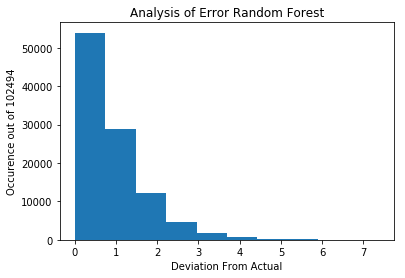

In [41]:
difftrain=np.absolute(np.absolute(predicted_test-y_test))

import matplotlib.pyplot as plt

plt.hist(difftrain)
plt.xlabel('Deviation From Actual')
plt.ylabel('Occurence out of '+str(difftrain.size))
plt.title('Analysis of Error Random Forest')
plt.show()

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Histogram(x=difftrain,
                     histnorm='probability')]

py.iplot(data, filename='normalized histogram')

/home/a_parida/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



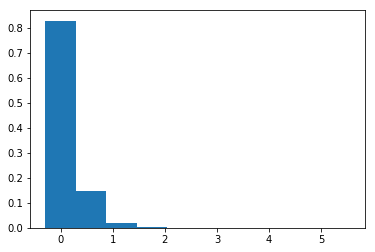

In [25]:
results, edges = np.histogram(difftrain, normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)
plt.show()

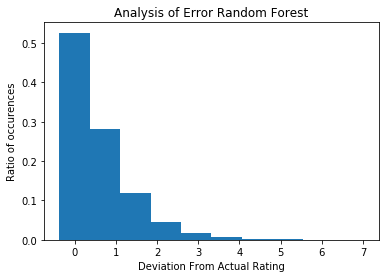

In [42]:
results, edges = np.histogram(np.absolute(predicted_test-y_test), normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)
plt.xlabel('Deviation From Actual Rating')
plt.ylabel('Ratio of occurences')
plt.title('Analysis of Error Random Forest')
plt.show()

In [28]:
edges[:-1]


array([ 0.        ,  0.73830952,  1.47661905,  2.21492857,  2.9532381 ,
        3.69154762,  4.42985714,  5.16816667,  5.90647619,  6.64478571])

In [44]:
msearray=np.array([1.4739953010459481,1.5200419479263594,1.5163450145879727,1.5176505509306613])

In [45]:
r2array=np.array([0.455,0.438,0.439,0.439])

In [46]:
featarray=np.array([10,8,7,6])

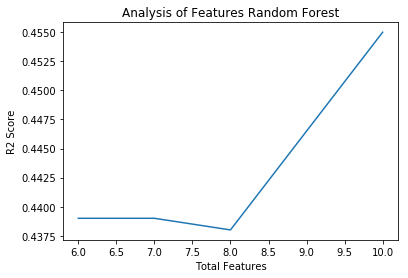

In [52]:
plt.plot(featarray,r2array)
plt.xlabel('Total Features')
plt.ylabel('R2 Score')
plt.title('Analysis of Features Random Forest')
plt.show()

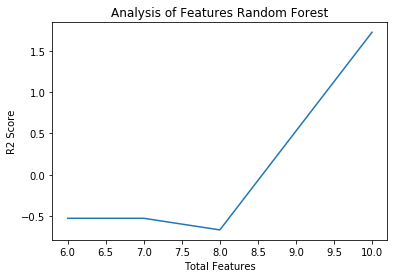

In [58]:
plt.plot(featarray,(r2array-r2array.mean())/r2array.std())
plt.xlabel('Total Features')
plt.ylabel('R2 Score Normalised')
plt.title('Analysis of Features Random Forest')
plt.show()

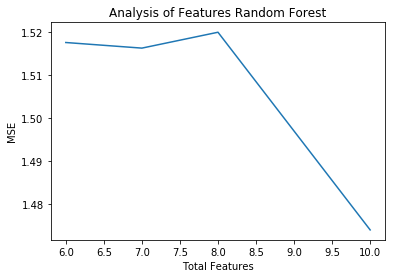

In [51]:
plt.plot(featarray,msearray)
plt.xlabel('Total Features')
plt.ylabel('MSE')
plt.title('Analysis of Features Random Forest')
plt.show()